In [1]:
%load_ext autoreload
%autoreload 2   

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import data_analysis as helper

In [7]:
us_data = helper.csv_to_dataframe('data/2020-elections-data.csv')
leading_digits_us = helper.find_all_leading_digits(us_data['votes'], 1)
russia_data = helper.csv_to_dataframe('data/2018-Russia-election-data.csv')
leading_digits_russia = helper.find_all_leading_digits(russia_data['votes'], 1)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


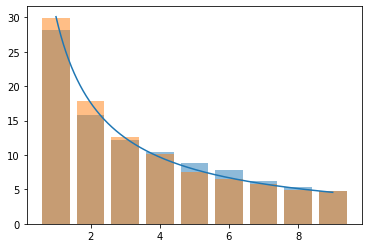

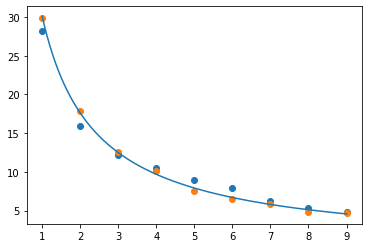

In [4]:
us_percentages = helper.data_to_percentage(leading_digits_us)
russia_percentages = helper.data_to_percentage(leading_digits_russia)
print(us_percentages.index)

ideal_values = helper.get_theoretical_benford_law_values(1000)

plt.bar(russia_percentages.index, russia_percentages, alpha=0.5)
plt.bar(us_percentages.index, us_percentages, alpha=0.5)

plt.plot(ideal_values.index, ideal_values)

plt.figure()

plt.scatter(russia_percentages.index, russia_percentages)
plt.scatter(us_percentages.index, us_percentages)

plt.plot(ideal_values.index, ideal_values)


(array([ 3.36227189, -1.0322877 ]), array([[ 0.08573876, -0.03951292],
       [-0.03951292,  0.05814545]]))


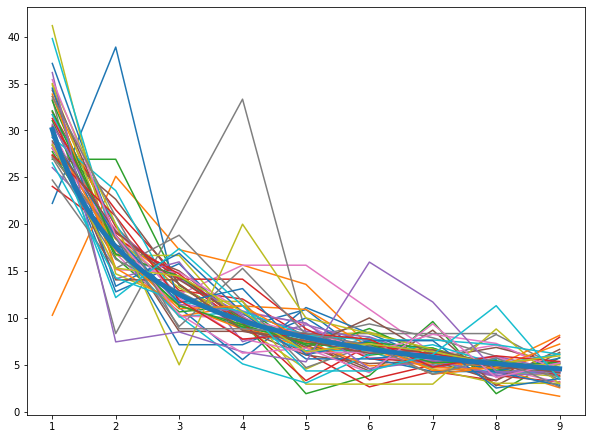

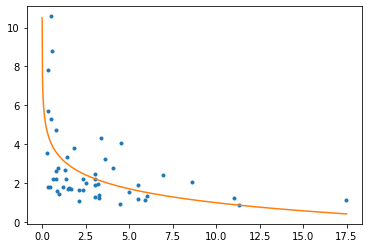

In [17]:
us_states_data = helper.get_votes_per_parameter(us_data, 3)
us_states_votes_sum = helper.sum_votes(us_data, 3) / 1000000
#us_states_leadings_digits = helper.find_all_leading_digits(us_states_data,1,)
#states_percentages = [helper.data_to_percentage(us_states_leadings_digits, state_names)]
# fig,axis = plt.subplots(nrows = 1, ncols = 1)
from scipy.optimize import curve_fit
import numpy as np

us_states_std_dev = {}
plt.figure(figsize=(10,7.5))
for state in us_states_data.columns: 
    state_leading_digits = helper.find_all_leading_digits(us_states_data[state],1)
    state_percentages = helper.data_to_percentage(state_leading_digits)
    us_states_std_dev[state] = helper.find_std_dev_to_ideal(state_percentages)
    plt.plot(state_percentages.index, state_percentages)
us_states_std_dev = pd.DataFrame(us_states_std_dev, index=[0])
plt.plot(ideal_values.index, ideal_values, linewidth=5.0)
plt.figure()
plt.plot(us_states_votes_sum.iloc[0], us_states_std_dev.iloc[0], '.')
values = curve_fit(lambda t, a, b: a+b*np.log(t), us_states_votes_sum.iloc[0], us_states_std_dev.iloc[0])
print(values)
pop_values = np.linspace(.001, 17.5, 1000)
plt.plot(pop_values, values[0][0] + values[0][1] * np.log(pop_values))

In [15]:
print(helper.sum_votes(us_data, 0))

   Donald J. Trump  Joseph R. Biden Jr.  Dr. Jo Jorgensen  Write-in  \
0         74205470             80962000         1862384.0  259243.0   

   James Janos  Donald L. Blankenship  Brock Pierce  Rocky de la Fuente  \
0       2675.0                11655.0       26711.0             62159.0   

   Gloria La Riva  Phil Collins  ...  Eric Boddie  Jerry Segal  Jade Simmons  \
0         41006.0        1162.0  ...         13.0       3054.0        2410.0   

   None of These Candidates  Sheila 'Samm' Tittle  Dario Hunter  \
0                   14079.0                 349.0        4970.0   

   Alyson Kennedy  Joe McHugh  H. Brooke Paige  Christopher LaFontaine  
0           160.0       100.0            858.0                   329.0  

[1 rows x 26 columns]


In [25]:
#sum_votes = helper.sum_votes(us_data,0)
state_votes_us = helper.get_votes_per_parameter(us_data, 3)
region_leading_digits = helper.find_all_leading_digits(state_votes_us.iloc[:,0],1)
print(helper.data_to_percentage(region_leading_digits))


1    30.451128
2    12.781955
3    15.789474
4     9.022556
5    10.902256
6     5.639098
7     5.639098
8     5.263158
9     4.511278
dtype: float64
